AxesSubplot(0.125,0.125;0.775x0.755)


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


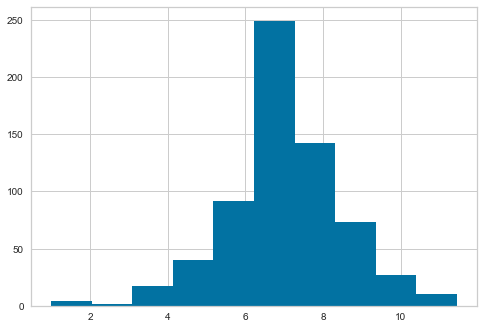

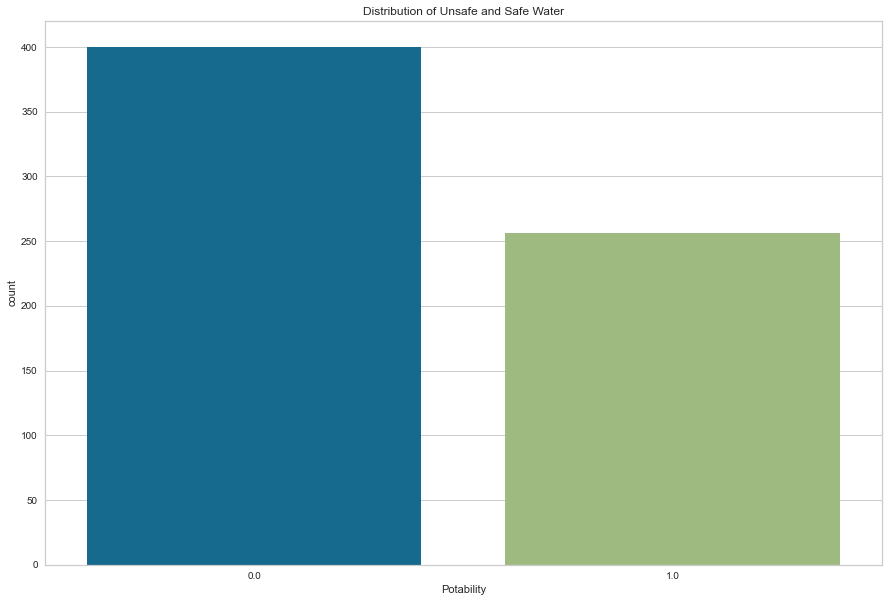

0.6097560975609756
0.5350609756097561
0.48323170731707316


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


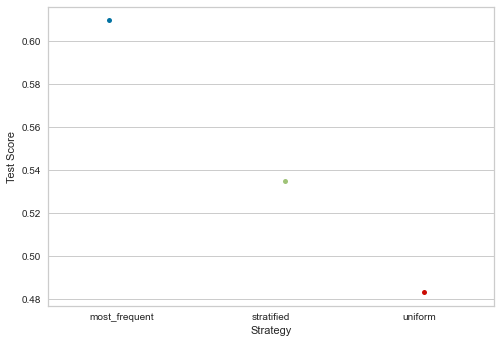

Accuracy of logistic regression classifier on test set: 0.62


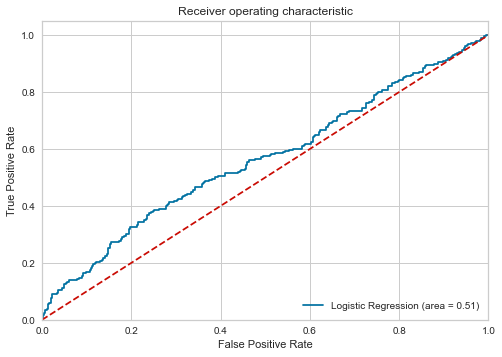

C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 20, 20, 8),
              learning_rate_init=0.1, max_iter=300, random_state=0,
              solver='sgd')
0.7576219512195121


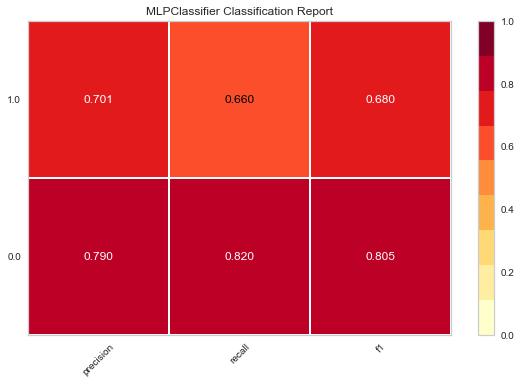

[[328  72]
 [ 87 169]]
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       400
         1.0       0.70      0.66      0.68       256

    accuracy                           0.76       656
   macro avg       0.75      0.74      0.74       656
weighted avg       0.76      0.76      0.76       656



C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


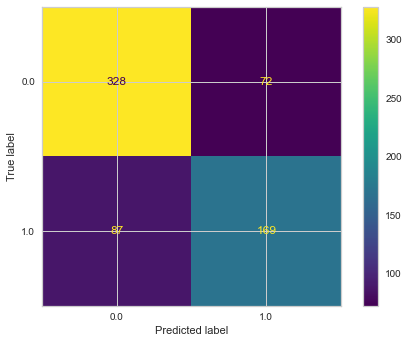

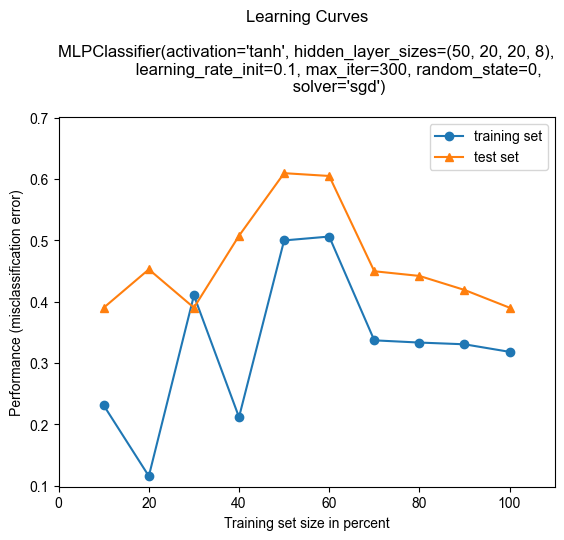

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       400
         1.0       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656

+-------+-----------+--------+---------------+----------+---------------+------------+
|  set  | ativation | solver | learning rate | max iter | hidden layers | accuracy % |
+-------+-----------+--------+---------------+----------+---------------+------------+
| train |    tanh   |  sgd   |      0.01     |    50    |    18,12,8    |    62.5    |
| train |    relu   |  sgd   |      0.1      |   100    |    50,30,8    |     66     |
| train |    relu   |  sgd   |      0.1      |   150    |    50,30,8    |    71.6    |
| train |    relu   |  sgd   |      0.1   

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# This is a sample Python script.
from prettytable import PrettyTable
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_learning_curves
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
#----------------------------- ULOHA 1 -----------------------------

waterTrain = pd.read_csv("C:/Users/j4jan/Documents/SUNS/workspace/zadanie1/data/water_test.csv")
waterTest = pd.read_csv("C:/Users/j4jan/Documents/SUNS/workspace/zadanie1/data/water_test.csv")
wineTrain = pd.read_csv("C:/Users/j4jan/Documents/SUNS/workspace/zadanie1/data/wine_train.csv")
wineTest = pd.read_csv("C:/Users/j4jan/Documents/SUNS/workspace/zadanie1/data/wine_test.csv")

waterProperties = list(waterTrain.columns.values)
wineProperties = list(wineTrain.columns.values)

#Zbavime sa Nan alebo null hodnoty
waterTrain['ph'] = waterTrain['ph'].fillna(
    waterTrain.groupby(['Potability'])['ph'].transform('mean'))
waterTrain['Sulfate'] = waterTrain['Sulfate'].fillna(waterTrain.groupby(
    ['Potability'])['Sulfate'].transform('mean'))
waterTrain['Trihalomethanes'] = waterTrain['Trihalomethanes'].fillna(
    waterTrain.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

#Zbavime sa Nan alebo null hodnoty aj pre test
waterTest['ph'] = waterTest['ph'].fillna(
    waterTest.groupby(['Potability'])['ph'].transform('mean'))
waterTest['Sulfate'] = waterTest['Sulfate'].fillna(waterTest.groupby(
    ['Potability'])['Sulfate'].transform('mean'))
waterTest['Trihalomethanes'] = waterTest['Trihalomethanes'].fillna(
    waterTest.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

#Zobrazenie oboch mnozin pred normalizaciou

# print(waterTrain.mean())
# print(waterTrain.std())
# print('-')
# print(waterTest.mean())
# print(waterTest.std())
# print('-')
# print(wineTrain.mean())
# print(wineTrain.std())
# print('-')
# print(wineTest.mean())
# print(wineTest.std())

print(waterTrain['ph'].hist())

#NORMALIZOVANIE
min_max_scaler = MinMaxScaler()
waterTrain[waterProperties] = min_max_scaler.fit_transform(waterTrain[waterProperties])
waterTest[waterProperties] = min_max_scaler.fit_transform(
    waterTest[waterProperties])

min_max_scaler = MinMaxScaler()
wineTrain[wineProperties] = min_max_scaler.fit_transform(wineTrain[wineProperties])
wineTest[wineProperties] = min_max_scaler.fit_transform(
    wineTest[wineProperties])

#Zobrazenie oboch mnozin PO normalizacií

# print(waterTrain.mean())
# print(waterTrain.std())
# print(waterTest.mean())
# print(wineTrain.mean())
# print(wineTest.mean())

# print(waterTrain['ph'].hist())


plt.figure(figsize=(15, 10))
sns.countplot(waterTrain.Potability)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

# waterTrain.hist(column='pH')

waterProperties.remove('Potability')

x_train = waterTrain[waterProperties]
y_train = waterTrain['Potability']

x_test = waterTest[waterProperties]
y_test = waterTest['Potability']

strategies = ['most_frequent', 'stratified', 'uniform']
  
test_scores = []
for s in strategies:
    dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(x_train, y_train)
    score = dclf.score(x_test, y_test)
    print(score)
    test_scores.append(score)

ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_test, y_test)

#
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
    logreg.score(x_test, y_test)))

logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# ------------------------------------

# 0.25 x 0.8 = 0.2 
# define the keras model
# model = Sequential()
# model.add(Dense(16, input_dim=9, activation='relu'))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# # compile the keras model
# model.compile(loss='binary_crossentropy',
#               optimizer='adam', metrics=['accuracy'])
# # fit the keras model on the dataset

# callback = EarlyStopping(monitor='loss', patience=10)

# history = model.fit(x_train, y_train, epochs=200, batch_size=30,
#           validation_data=(x_test, y_test), callbacks=[callback])
# # evaluate the keras model
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# y_pred = model.predict(x_test, verbose=0)

# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.plot(history.history['loss'], label="train")
# plt.plot(history.history['val_loss'], label="validate")
# plt.legend(loc="upper right")
# plt.show()
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=1)
 
mlpc = MLPClassifier(activation='tanh', solver='sgd', alpha=0.0001,learning_rate_init= 0.1, max_iter=300,  hidden_layer_sizes=(50, 20,20, 8), random_state=0)
mlpc = mlpc.fit(x_train, y_train)
result = mlpc.predict(x_test)
print(mlpc)
print(accuracy_score(y_test, result))

visualizer = ClassificationReport(mlpc)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

cm = confusion_matrix(y_test, result)
print(cm)  
print(classification_report(y_test,result))
# a = cross_val_score(mlpc, x_train, y_train, cv=5,
#                     scoring='accuracy').mean()*100
# print("%f " % a)

plot_confusion_matrix(mlpc, x_test, y_test)
plt.show()
plot_learning_curves(x_val, y_val, x_test, y_test, mlpc)
plt.show()



# ----- GRID search

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
# fitting the model for grid search 
grid.fit(x_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_test)

# print classification report 
print(classification_report(y_test, grid_predictions)) 

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["set", "ativation", "solver",
                       "learning rate", "max iter", "hidden layers", "accuracy %"])

# Add rows
myTable.add_row(["train", "tanh", "sgd", "0.01", "50", "18,12,8", "62.5"])
myTable.add_row(["train", "relu", "sgd", "0.1", "100", "50,30,8", "66"])
myTable.add_row(["train", "relu", "sgd", "0.1", "150", "50,30,8", "71.6"])
myTable.add_row(["train", "relu", "sgd", "0.1", "200", "50,30,8", "73"])
myTable.add_row(["train", "relu", "sgd", "0.1", "300", "50,30,8", "72.8"])
myTable.add_row(["train", "relu", "sgd", "0.1", "300", "50,20,20, 8", "69.8"])
myTable.add_row(["train", "tanh", "sgd", "0.1", "300", "50,20,20, 8", "75.7"])
myTable.add_row(["train", "tanh", "adam", "0.1", "300", "50,20,20, 8", "60"])

print(myTable)
